<a href="https://colab.research.google.com/github/hongru94/CS675_final_project/blob/main/CS675_Final_Project_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 Incident Projection
Project mentor: Numair Sani

Hongru Du <hdu9@jhu.edu>, Ensheng Dong <edong1@jhu.edu>, Huaizhong Zhang, <hzhan136@jhu.edu>, Stefano Tusa <stefanodanieltusa@gmail.com>

Link_to_git_repo: https://github.com/hongru94/CS675_final_project

**Note**: the illustrations about the method and split of training and test datasets are in the GitHub readme file.

Presentation slides: https://arcg.is/nLuaG

# Outline and Deliverables


### Completed Deliverables
1. Projection of the covid-19 cases for each US state in four future week. (see result section)
2. Set up a model framework that could take prediction as input to make future predictions. (see result section)
3. Construct a robust machine learning model for state level incidence prediction. (see result section)
4. Apply an unsupervised learning method to find clusters, and see if they have any spatial-temporal connection. (see result section)


### Uncompleted Deliverables
1. Test the climatology factors. No proper data is available at a finer scale.
2. Full model performance analysis (Need more time to run model at different time points)



### Additional Deliverables
1. Detailed comparison with CDC ensemble model and the ground truth. (see the result section)

# Preliminaries

## What problem were you trying to solve or understand?

A local outbreak of “pneumonia of unknown cause” detected in Wuhan, Hubei Province, China in late December 2019, has since spread to more than 190 countries, with more than 72 million cases as of December 14, 2020. The situation became more serious in places outside of China, such as the US, Europe, India and Brazil. In response to this ongoing public health emergency, we are planning to predict the incidence rate for each US state by considering factors including historical cases, county or state demographics, local public health facilities, community mobility, temperature and humidity for each county. Recent studies show that the purpose of trips and density of destination also play important roles to quantify transmission risk. We want to adopt the information from those generated variable to make predictions on daily incident in 1 to 4 weeks. While, we realize that there are a lot of models available in the CDC COVID projection, most of them are good at trend fitting. Thus some trend changes may not well projected. Our baseline for this project is make reasonable state level projections (output within the interval of CDC ensemble model) and optimal outcome is to capture those trend changing points. Unlike traditional SEIR transmission model (such as IHME) and time series models, we adopt LSTM networks, a special kind of RNN, to make more accurate incident projection.

## Datasets and Pre-processing

* COVID data. Total cases and deaths at the county level since January 22. The main data source for the covid cases at the countylevel is JHU CSSE GitHub (https://github.com/CSSEGISandData/COVID-19). To normalized the data, we will calculate the 7-day moving average. We are not taking advantage of the data from Our World in Data (https://ourworldindata.org) is because it does not provide US state level information.

* Designed variables, such as the daily cases/deaths, peak-day cases/deaths, growth rate, etc. Their data type would be binary,categorical or continuous data.

* Demographics. County-level demographic information, such as the gender and age. The data is provided by Esri and JHU CivicImpact.

* Public health facility information, including the number of beds, physicians, etc.

* Mobility data from Safegraph. This adjusted data set is provided by Google covering resident movement at the county level.

An example visualiztion of our features is include in our [presentation slide](https://storymaps.arcgis.com/stories/b83f1859687346c28edca65aa2bf9c73).

# Models and Evaluation

## Experimental Setup

For the training step, we test both Mean Square Loss, Mean Absolute Error and Smooth L1 Loss. Finaly we choose to use Mean Square Loss since it has the best performance for the test set.

We are using mean absolute error to evaluate the performance among our results, CDC ensemble resutls and the ground truth. The 

$MAE = \frac{\sum_{i=1}^n |y_i-x_i|}{n}$, where $y_i$ is the prediction, $x_i$ is the true value, and $n$ is the total number of data points.


## Baselines 

Our baseline is to find a machine learning model that works better than curve fitting. Based on our model performance, we could conclude that our model can produce more information than the curve fitting. For instance, our model could predict trend changes of daily cases curve in the future 4 weeks.

## Methods

Our primary model is Long Short-Term Memory (LSTM) Recurrent Neural Network (RNN). The framework of model are shown in our presentation [link](https://storymaps.arcgis.com/stories/b83f1859687346c28edca65aa2bf9c73). Please refer to the Prediction directory in the GitHub for the two trained models.

The plot for iteration against training loss are stored in [Model File](https://github.com/hongru94/CS675_final_project/blob/main/Model/loss.png).

In [ ]:
# Code for training models, or link to your Git repository

In [ ]:
# Show plots of how these models performed during training.
#  For example, plot train loss and train accuracy (or other evaluation metric) on the y-axis,
#  with number of iterations or number of examples on the x-axis.

## Results

Since we need a four weeks period to test our model performance, we assume we have no data since October 30th and run our model at that point and compare with true daily cases for the first 4 weeks of November. We take our model outputs and compare with ground truth cases data and also the projections from COVIDhub ensemble model.

Our ground truth daily cases data are from JHU CSSE Github [https://github.com/CSSEGISandData/COVID-19].

COVIDhub ensemble Projection data are from [https://github.com/reichlab/covid19-forecast-hub]

State FIPS reference table from [https://github.com/kjhealy/fips-codes]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 14, 10

In [ ]:
# Read our results file
url = 'https://raw.githubusercontent.com/hongru94/CS675_final_project/main/Predictions/model_outputs_week44.csv'
result = pd.read_csv(url, dtype = {'FIPS' : np.str_})
result = result.drop(columns = 'Unnamed: 0')

In [ ]:
result.head(5)
#First column refers to the fips code for each state
#Week column refer to number of week in the future, eg week 1 means 

,FIPS,Date,Predicted_Cases,Week
0,36,2020-11-01,3054.343262,Week1
1,36,2020-11-02,3117.647461,Week1
2,36,2020-11-03,3254.234619,Week1
3,36,2020-11-04,3349.499268,Week1
4,36,2020-11-05,3427.557617,Week1


In [ ]:
#Import projection of 2020-11-02 from COVID projection hub
url2 = 'https://raw.githubusercontent.com/reichlab/covid19-forecast-hub/master/data-processed/COVIDhub-ensemble/2020-11-02-COVIDhub-ensemble.csv'
cdc_ensemble = pd.read_csv(url2)

In [ ]:
cdc_ensemble.head(5)

,forecast_date,target,target_end_date,location,type,quantile,value
0,2020-11-02,1 wk ahead cum death,2020-11-07,60,quantile,0.010,0
1,2020-11-02,1 wk ahead cum death,2020-11-07,60,quantile,0.025,0
2,2020-11-02,1 wk ahead cum death,2020-11-07,60,quantile,0.050,0
3,2020-11-02,1 wk ahead cum death,2020-11-07,60,quantile,0.100,0
4,2020-11-02,1 wk ahead cum death,2020-11-07,60,quantile,0.150,0


In [ ]:
from datetime import date, datetime, timedelta

def perdelta(start, end, delta):
    curr = start
    while curr < end:
        yield curr
        curr += delta
cases_date = []
for i in perdelta(date(2020, 2, 1), date(2020, 11, 29), timedelta(days=1)):
    t =i.strftime('%Y-%m-%d')
    cases_date.append(t)

In [ ]:
#Import groundtruth cases data from JHU CSSE Github
CSSE_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
cases = pd.read_csv(CSSE_url, dtype = {'FIPS' : np.str_})
cases['FIPS'] = cases['FIPS'].str[:-2].str.zfill(5)
cases['FIPS'] = cases['FIPS'].str.zfill(5)

cases = cases.dropna()
cases = cases.set_index('FIPS')
cases = cases[cases['Admin2'] != 'Unassigned']

In [ ]:
daily_cases = cases.iloc[:, 19:322] - cases.iloc[:, 19:322].shift(axis = 1)
daily_cases = daily_cases.dropna(axis = 1)
daily_cases.columns = cases_date
daily_cases = daily_cases.loc[:, '2020-11-01' : '2020-11-28']
daily_cases_state = daily_cases.groupby(daily_cases.index.str[:2]).sum()

In [ ]:
#Read in state fips reference table
url3 = 'https://raw.githubusercontent.com/kjhealy/fips-codes/master/state_fips_master.csv'
fips_ref = pd.read_csv(url3, dtype = {'fips' : np.str_})
fips_ref['fips'] = fips_ref['fips'].str.zfill(2)

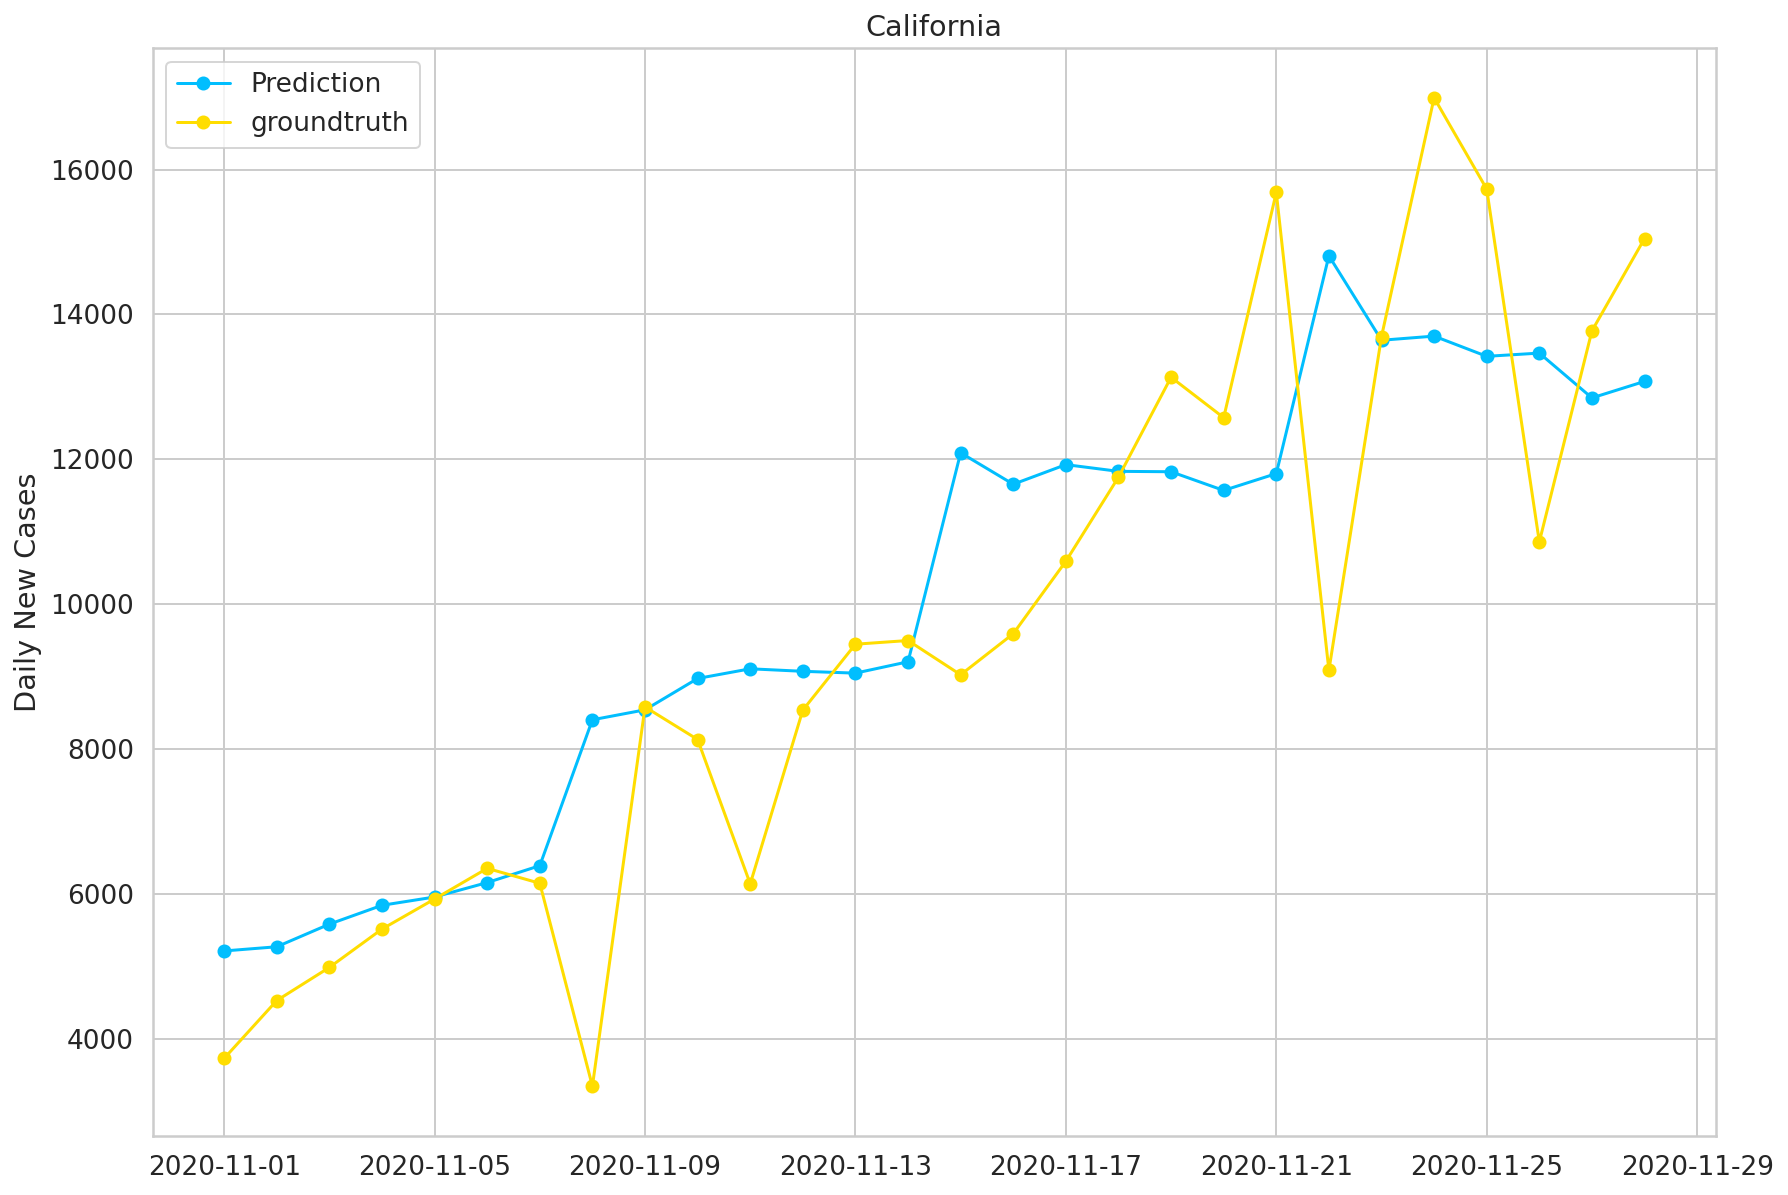

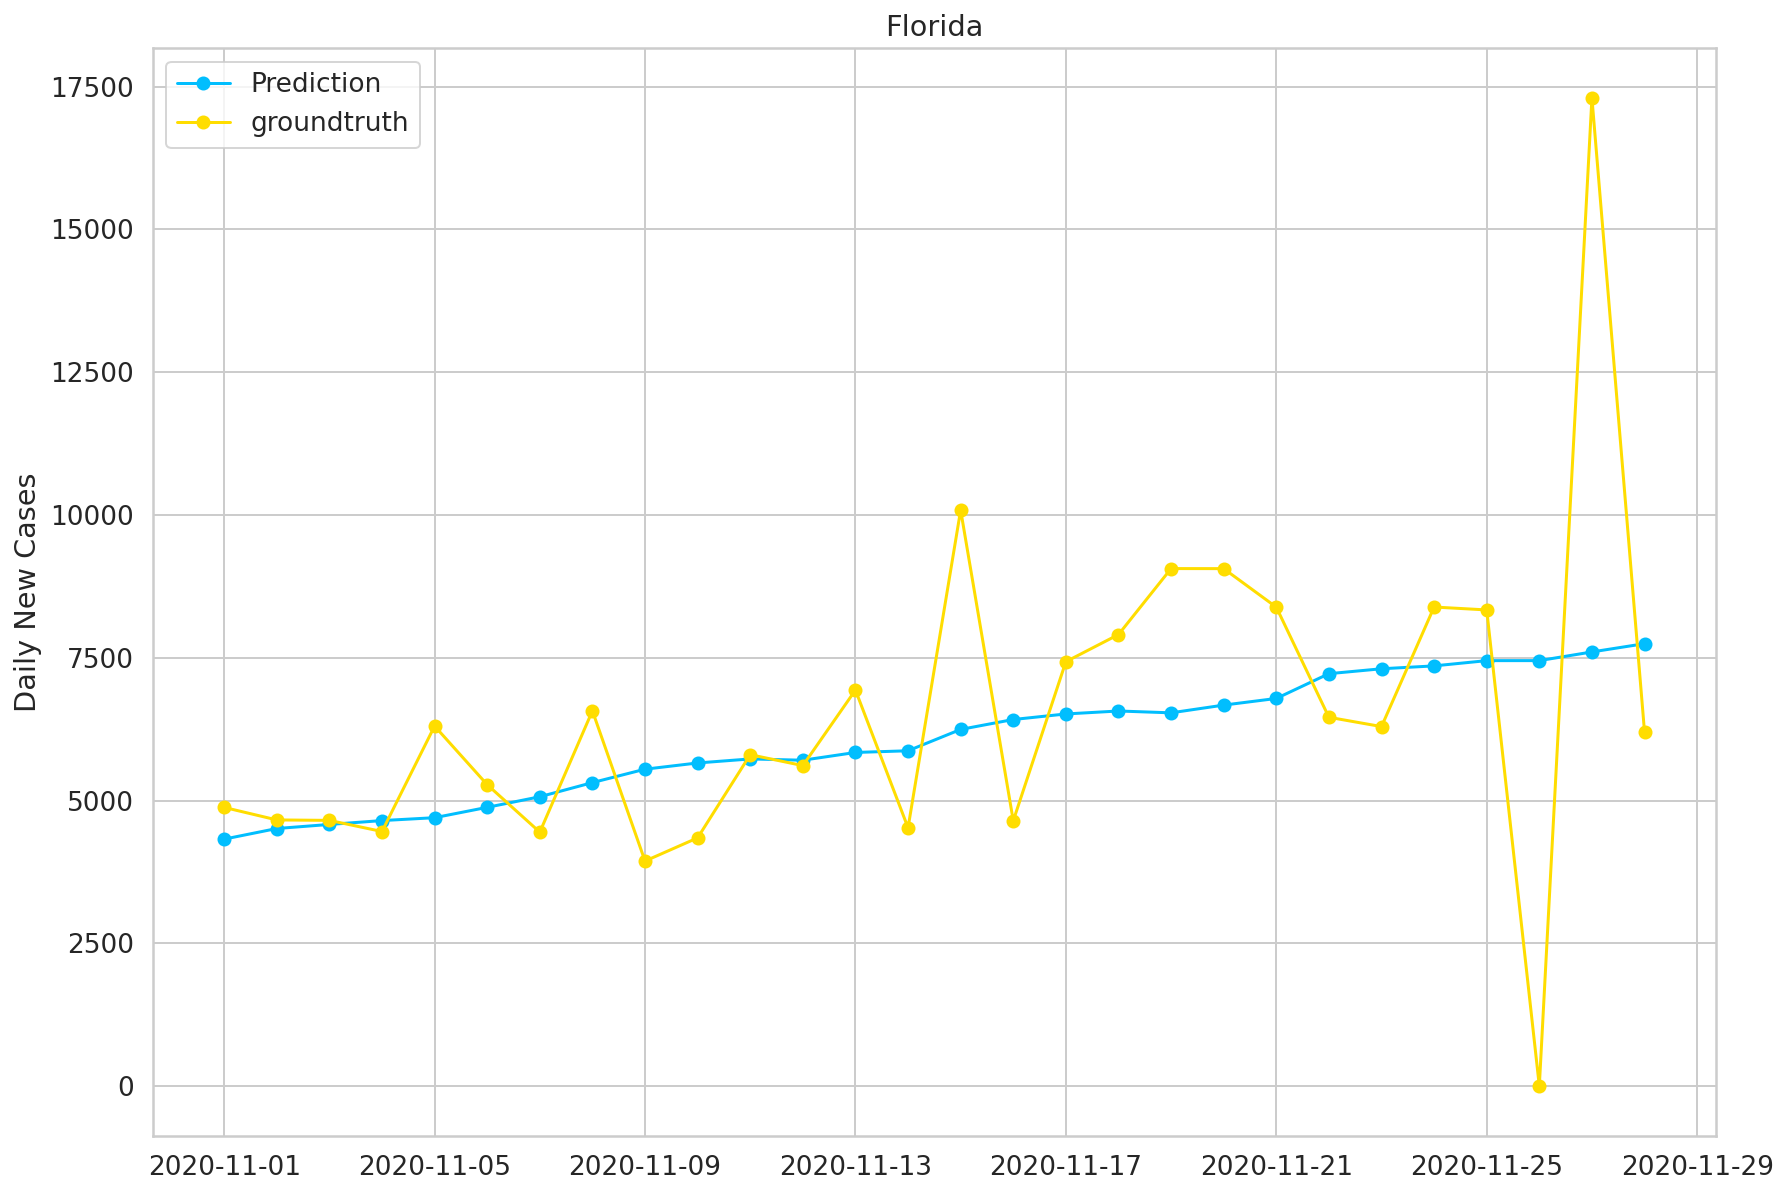

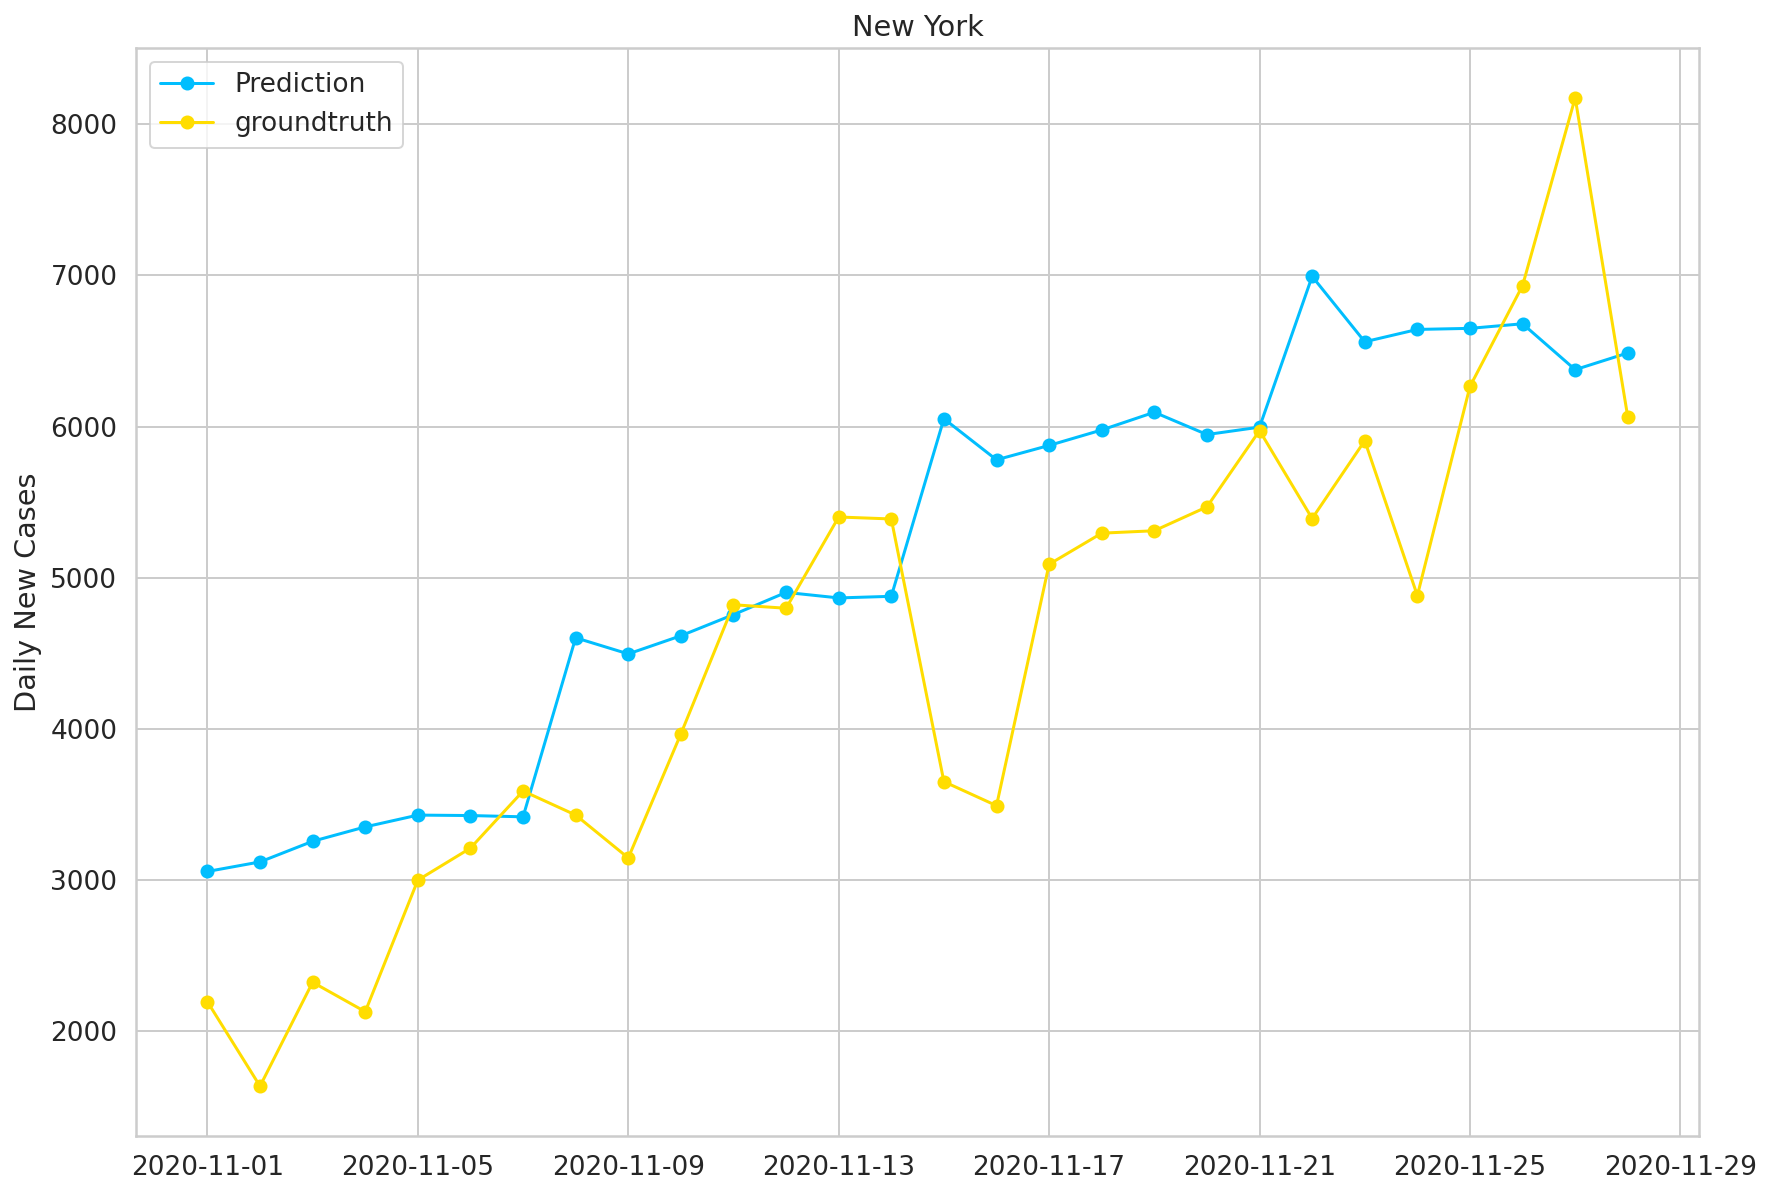

In [ ]:
j = 0
x = pd.to_datetime(result[result['FIPS'] == '36']['Date'])
y = pd.to_datetime(daily_cases_state.columns)
#Show select state projection at daily level 
for i in ['06', '12', '36']:
    if i != '11':
        
        plt.plot(x, result[result['FIPS'] == i]['Predicted_Cases'], label = 'Prediction', marker = 'o')
        plt.plot(y, daily_cases_state.loc[i], label = 'groundtruth', marker = 'o')
        plt.title(fips_ref[fips_ref['fips'] == i]['state_name'].item())
        plt.ylabel('Daily New Cases')
        plt.legend()
        plt.show()
    else:
        plt.plot(x, result[result['FIPS'] == i]['Predicted_Cases'], label = 'Prediction', marker = 'o')
        plt.plot(y, daily_cases_state.loc[i], label = 'groundtruth', marker = 'o')
        plt.ylabel('Daily New Cases')
        plt.title('Washington D.C.')
        plt.legend()
        plt.show()

In [ ]:
#Get week cases for each state
weekly_cases_state = daily_cases_state.groupby((np.arange(len(daily_cases_state.columns)) // 7) + 1, axis=1).sum().add_prefix('s')
weekly_result = result.groupby(['FIPS', 'Week']).sum()
weekly_result = weekly_result.unstack()


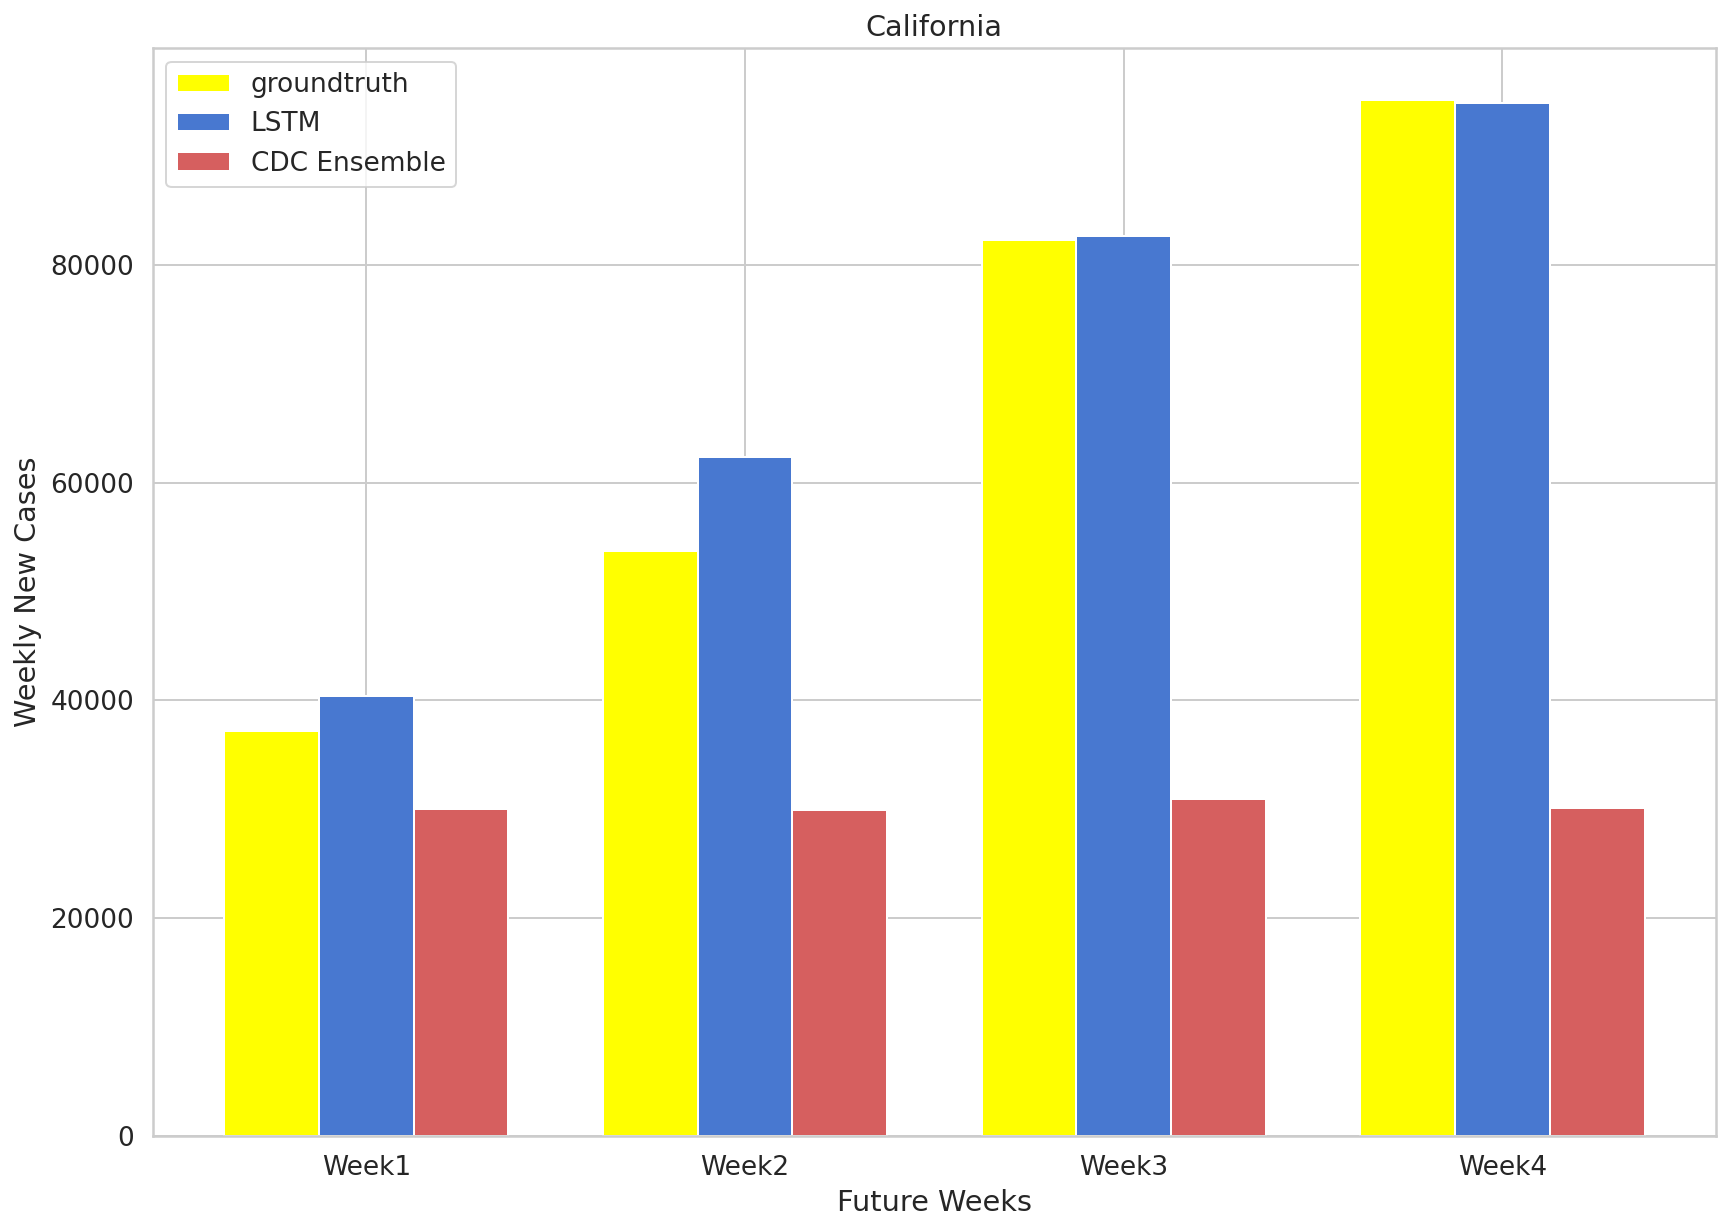

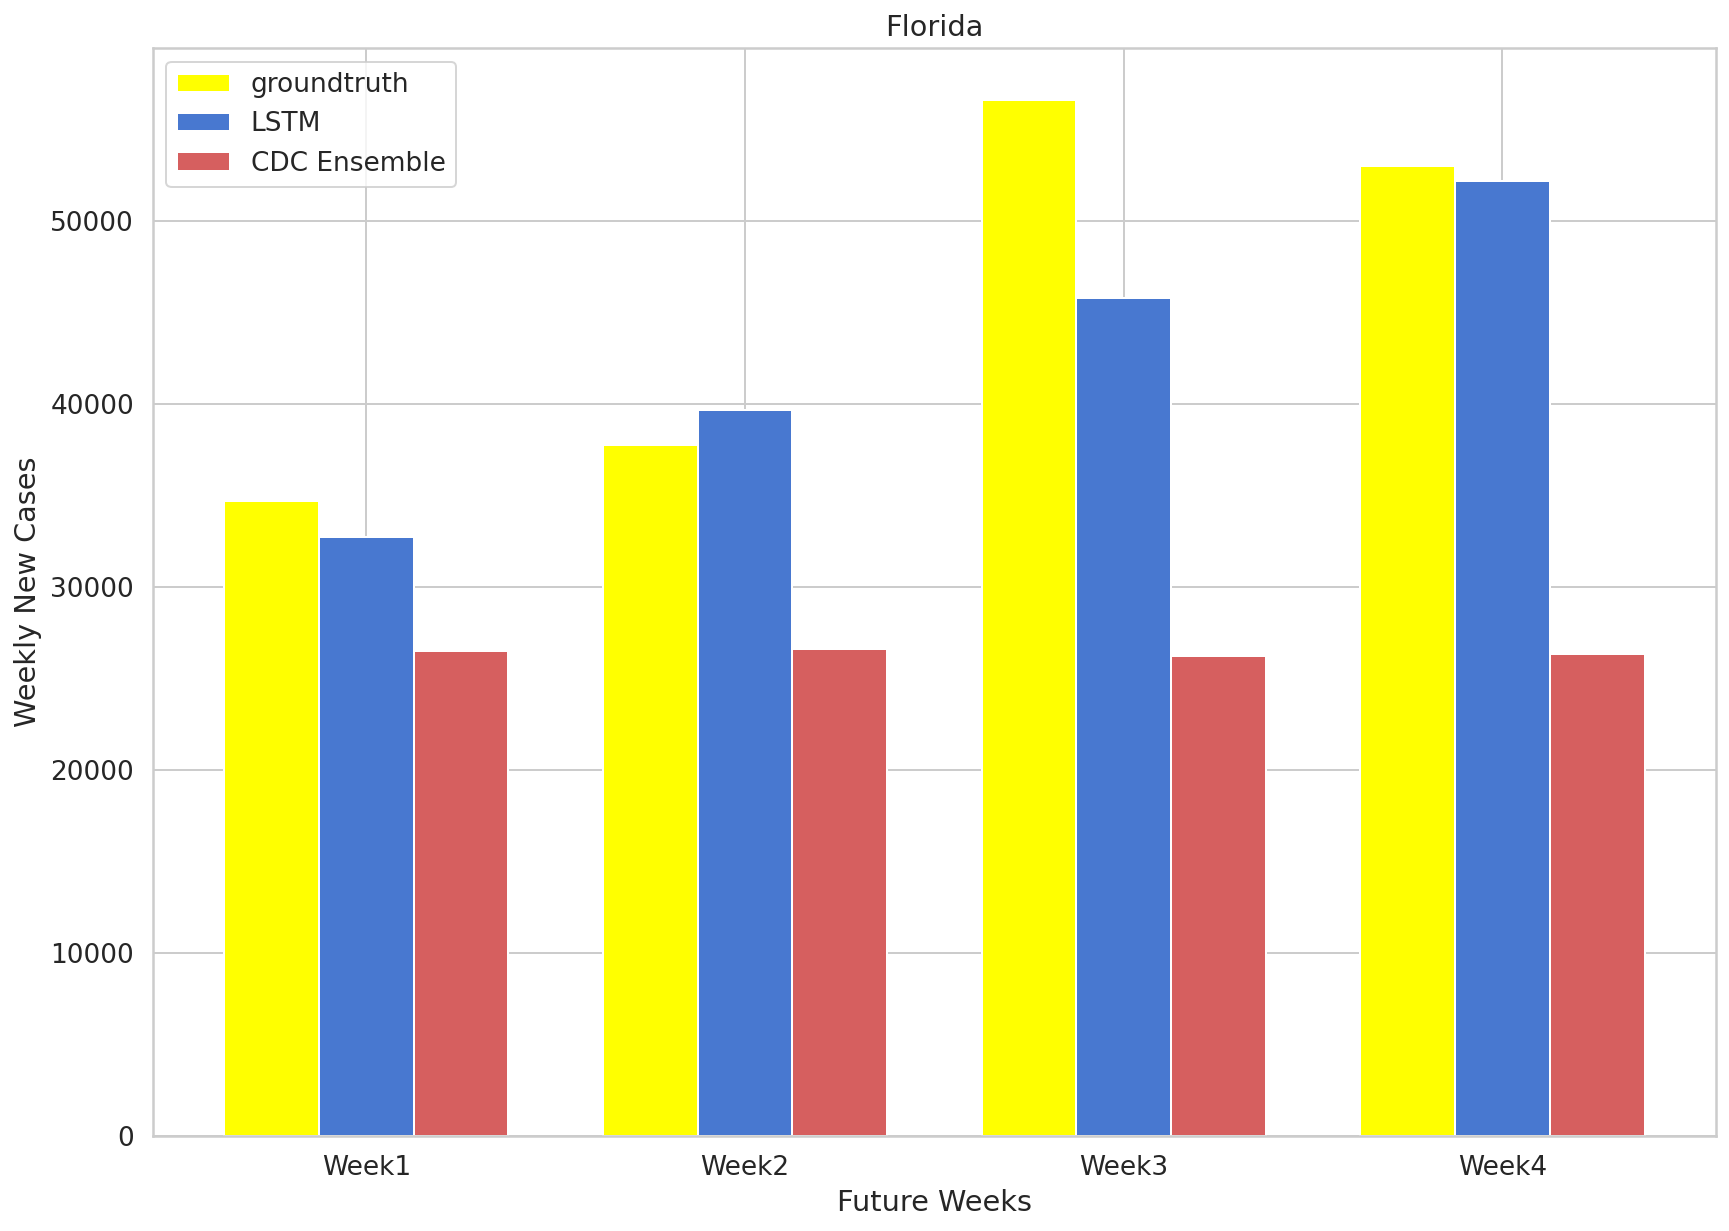

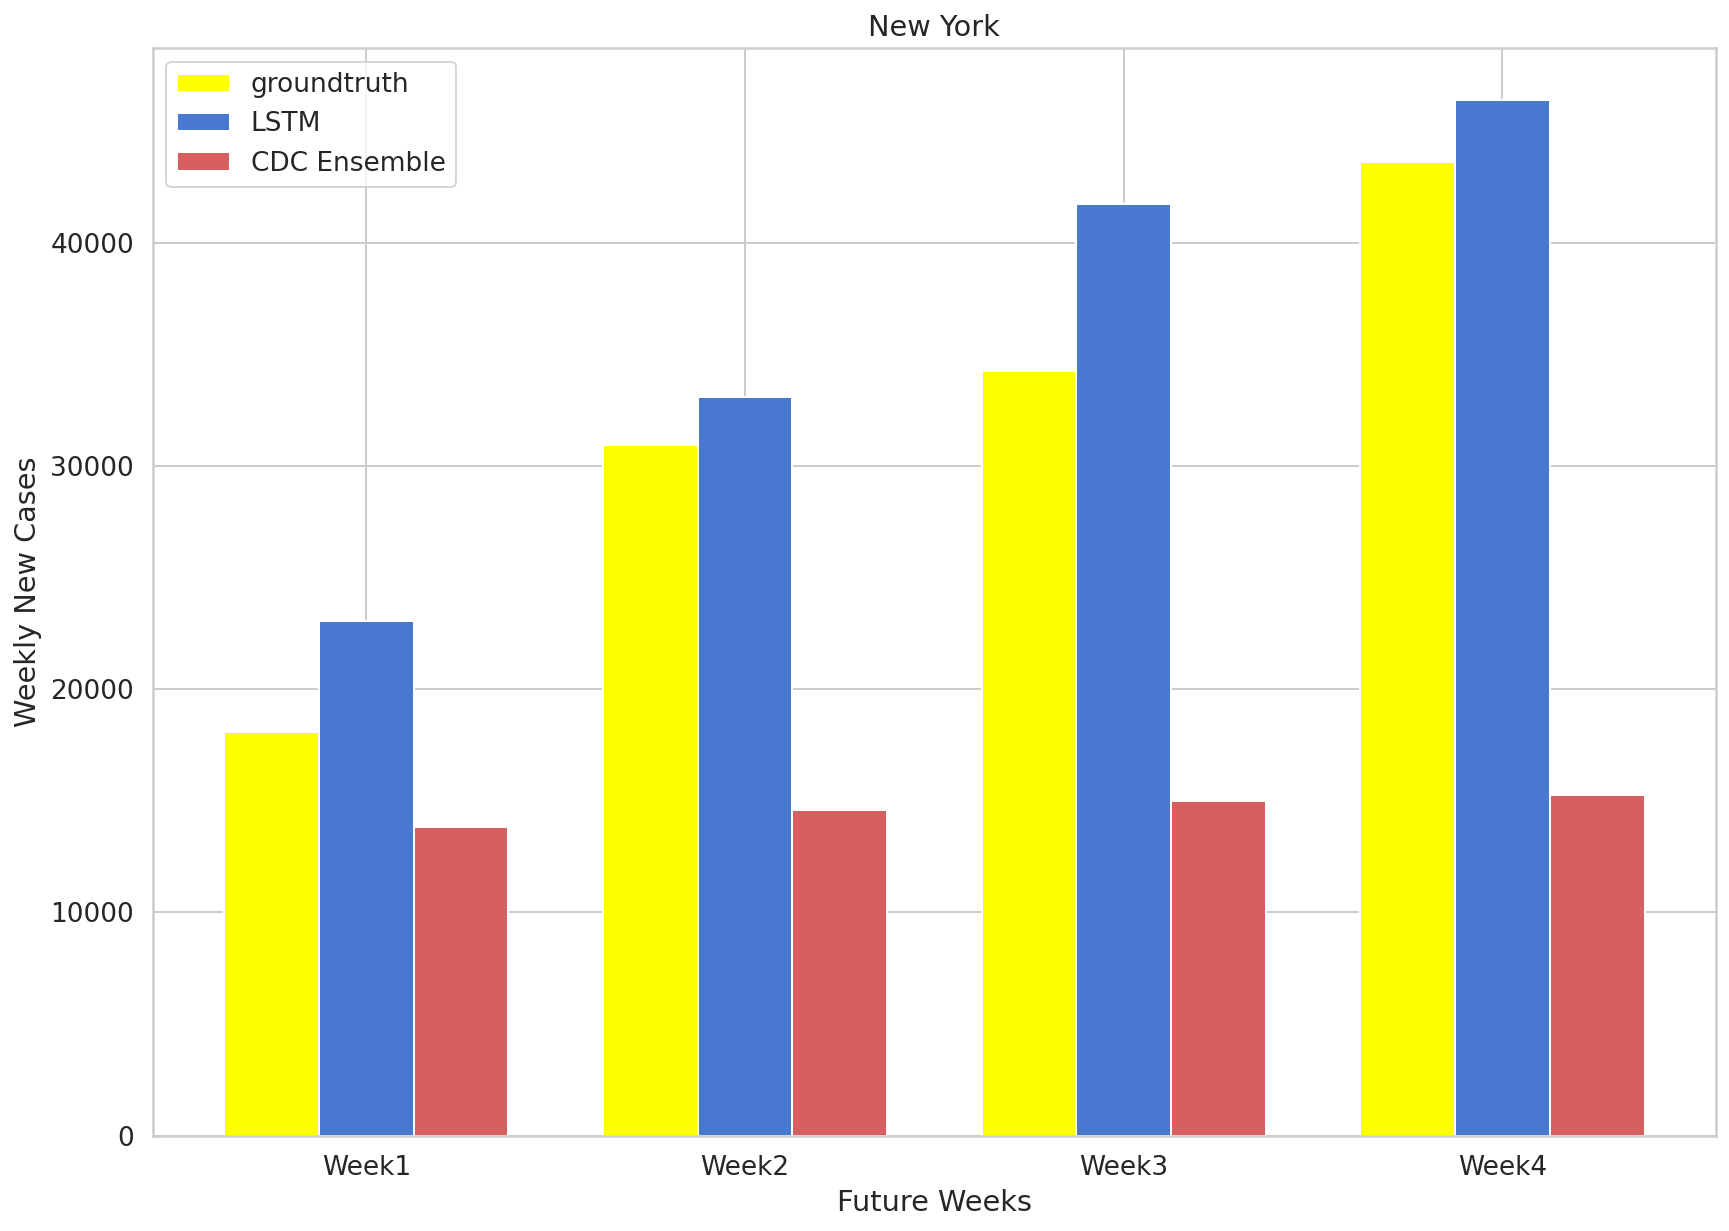

In [ ]:
#Compare performance for selected states
j = 0
x = np.array([1, 2, 3, 4])
my_xticks = ['Week1','Week2','Week3','Week4']
plt.xticks(x, my_xticks)
for i in ['06', '12', '36']:
    if i != '11':
        
        plt.bar(x - 0.25, weekly_cases_state.loc[i], width=0.25, label = 'groundtruth', color = 'yellow')
        plt.bar(x, weekly_result.loc[i], width=0.25, label = 'LSTM', color = 'b')
        plt.bar(x + 0.25,cdc_ensemble[(cdc_ensemble['location'] == i)&(cdc_ensemble['type'] == 'point')][-4:]['value'], 
                 label = 'CDC Ensemble', width=0.25, color = 'r')
        plt.title(fips_ref[fips_ref['fips'] == i]['state_name'].item())
        plt.xlabel('Future Weeks')
        plt.ylabel('Weekly New Cases')
        plt.xticks(x, my_xticks)
        plt.legend()
        plt.show()
    else:
        plt.bar(x - 0.25, weekly_cases_state.loc[i], width=0.25,label = 'groundtruth', color = 'yellow')
        plt.bar(x, weekly_result.loc[i], width=0.25, label = 'LSTM', color = 'b')
        plt.bar(x + 0.25, cdc_ensemble[(cdc_ensemble['location'] == i)&(cdc_ensemble['type'] == 'point')][-4:]['value'], 
                 label = 'CDC Ensemble',width=0.25, color = 'r')
        plt.xticks(x, my_xticks)
        plt.title('Washington D.C.')
        plt.legend()
        plt.show()


In [ ]:
#Put all the prediction together
compare_df = pd.DataFrame(columns = ['State', 'LSTM_pred', 'cdc_ensemble', 'ground_truth', 'Week'])
for i in weekly_result.index:
    for j in range(4):
        
        dic = {
            'State' : i,
            'LSTM_pred' : weekly_result.loc[i][j],
            'cdc_ensemble' : cdc_ensemble[(cdc_ensemble['location'] == i)&\
             (cdc_ensemble['target'] == str(j+1) + ' wk ahead inc case')&\
            (cdc_ensemble['type'] == 'point')]['value'].item(),
            'ground_truth' : weekly_cases_state.loc[i][j],
            'Week' : j + 1
        }
        
        compare_df = compare_df.append(dic, ignore_index = True)

In [ ]:
compare_df['MAE_cdc_ensemble'] = abs(compare_df['cdc_ensemble'] - compare_df['ground_truth'])
compare_df['MAE_LSTM'] = abs(compare_df['LSTM_pred'] - compare_df['ground_truth'])

In [ ]:
compare_df

,State,LSTM_pred,cdc_ensemble,ground_truth,Week,MAE_cdc_ensemble,MAE_LSTM
0,01,8774.622437,10323,9905.0,1,418,1130.377563
1,01,9043.732788,10730,12325.0,2,1595,3281.267212
2,01,9496.552490,11116,14865.0,3,3749,5368.447510
3,01,8792.697876,11310,14285.0,4,2975,5492.302124
4,02,3359.524200,2678,2935.0,1,257,424.524200
...,...,...,...,...,...,...,...
199,55,37963.715332,39303,32780.0,4,6523,5183.715332
200,56,2997.925720,2613,3299.0,1,686,301.074280
201,56,3684.536499,2774,5284.0,2,2510,1599.463501
202,56,4437.906433,2960,5529.0,3,2569,1091.093567


In [ ]:
def generate_barplot(week):
  state = []
  for i in compare_df[compare_df['Week'] == week].sort_values('MAE_LSTM', ascending = False)['State']:
      if i != '11':
        
         state.append(fips_ref[fips_ref['fips'] == i]['state_name'].item())
        
      else:
         state.append('Washington D.C.')
      x = np.arange(len(compare_df[compare_df['Week'] == week]))
  width = 0.4
  fig, ax = plt.subplots(figsize=(12,15))
  ax.barh(x - width/2, compare_df[compare_df['Week'] == week].sort_values('MAE_LSTM', ascending = False)['MAE_LSTM'], width, color = 'b', label = 'RNN')
  ax.barh(x + width/2, compare_df[compare_df['Week'] == week].sort_values('MAE_LSTM', ascending = False)['MAE_cdc_ensemble'], width, color = 'r', label = 'CDC ensemble')
  plt.yticks([r for r in x], state)
  plt.xlabel('Absolute Error')
  plt.title('Week '+ str(week) + ' Comparison')
  plt.legend()

In [ ]:
###The comparison between LSTM Model and CDC ensemble model at different future weeks are shown below:

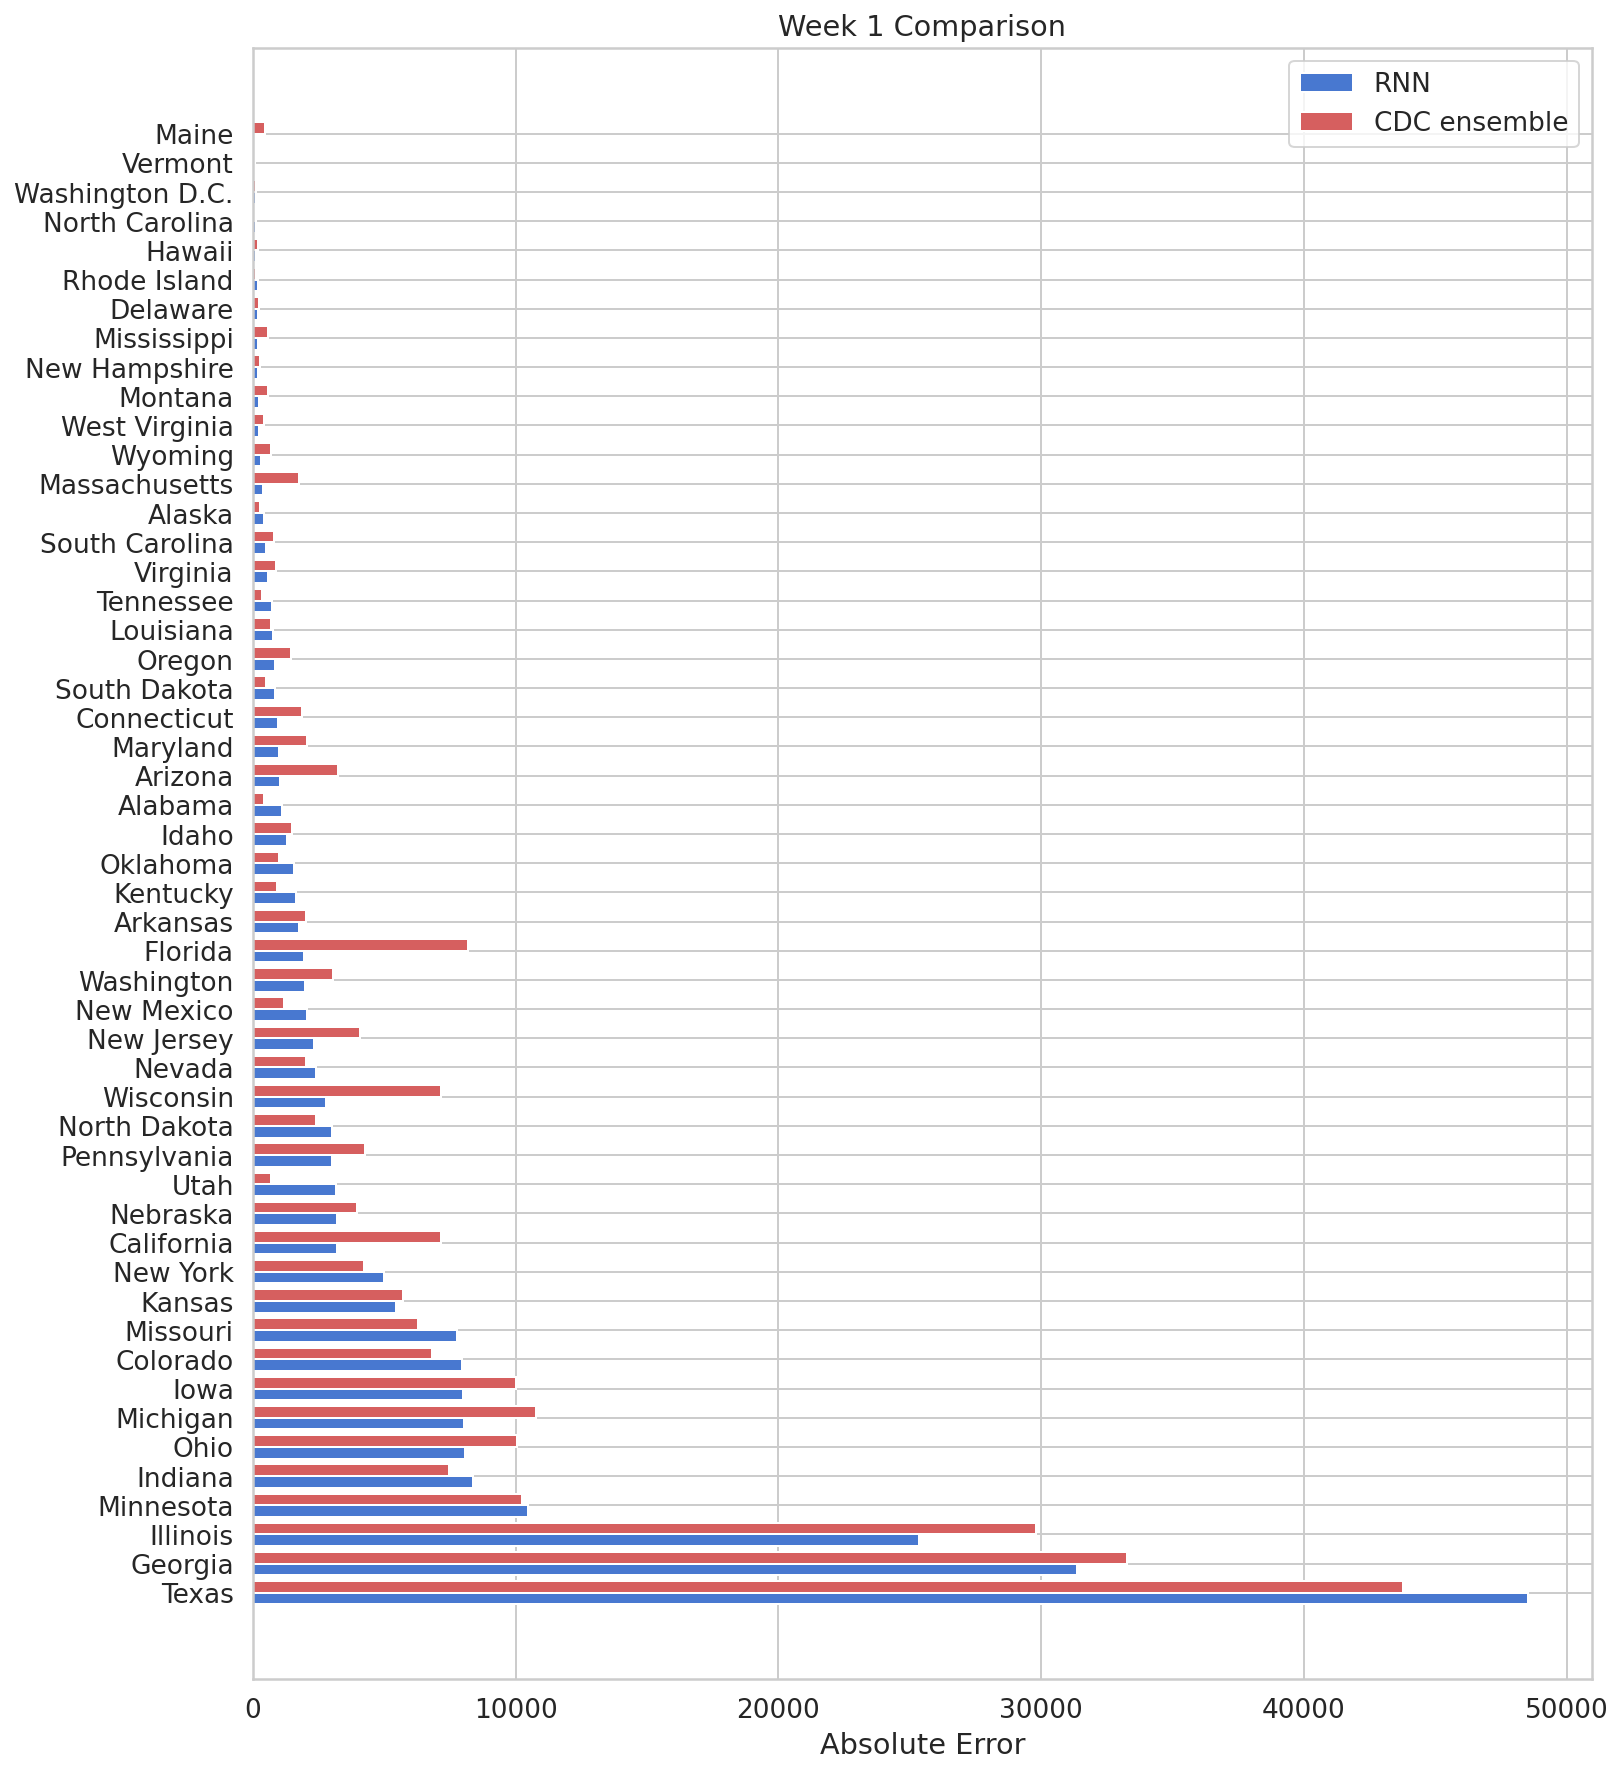

In [ ]:
generate_barplot(1)

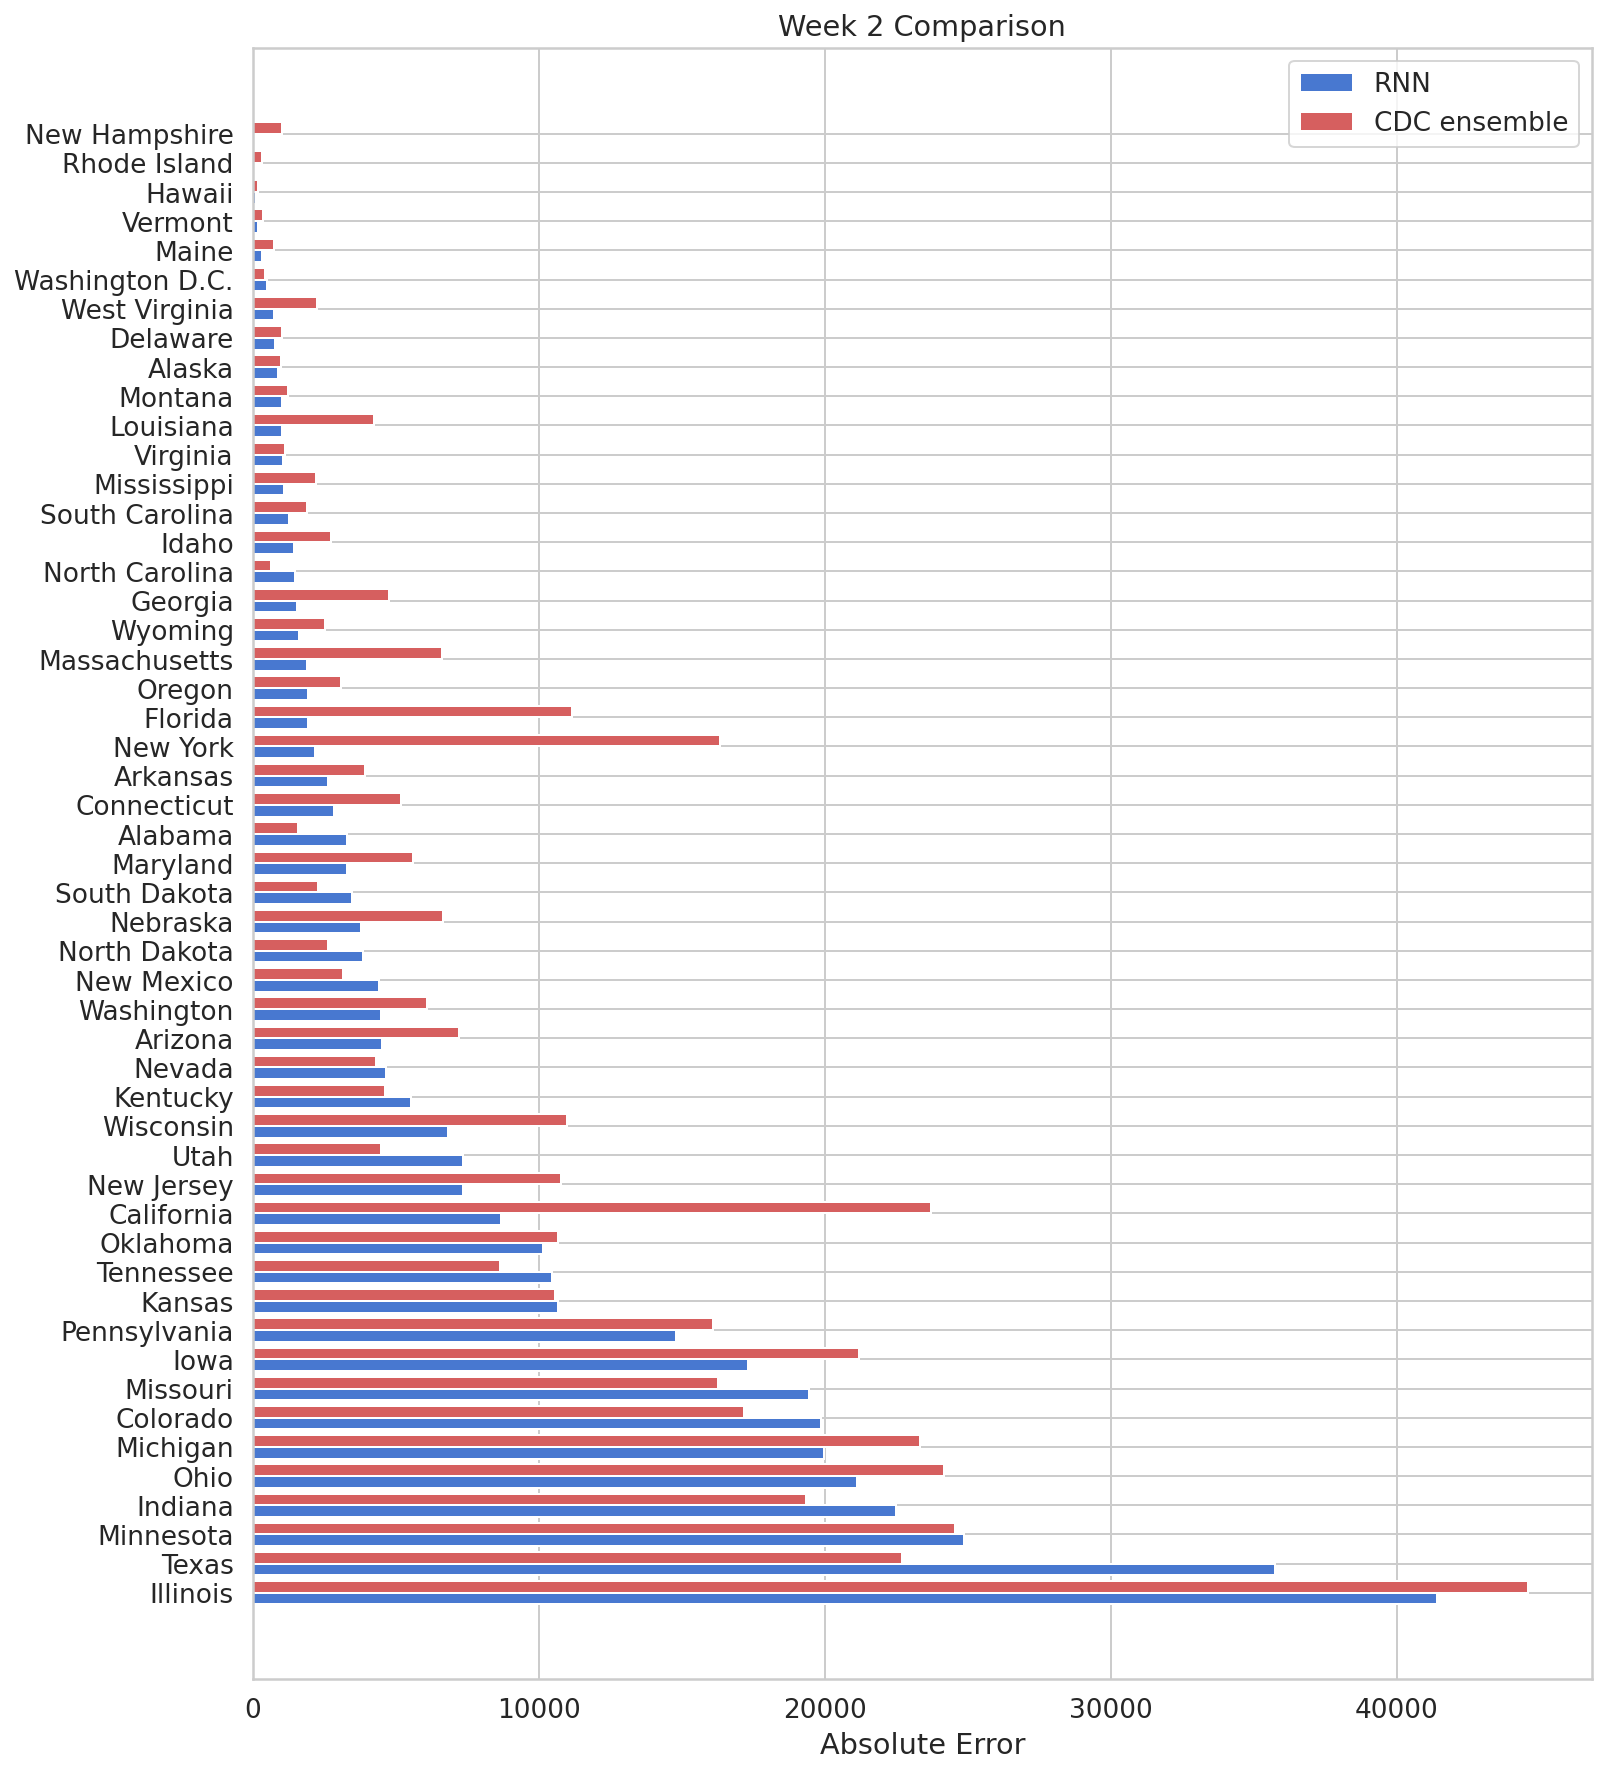

In [ ]:
generate_barplot(2)

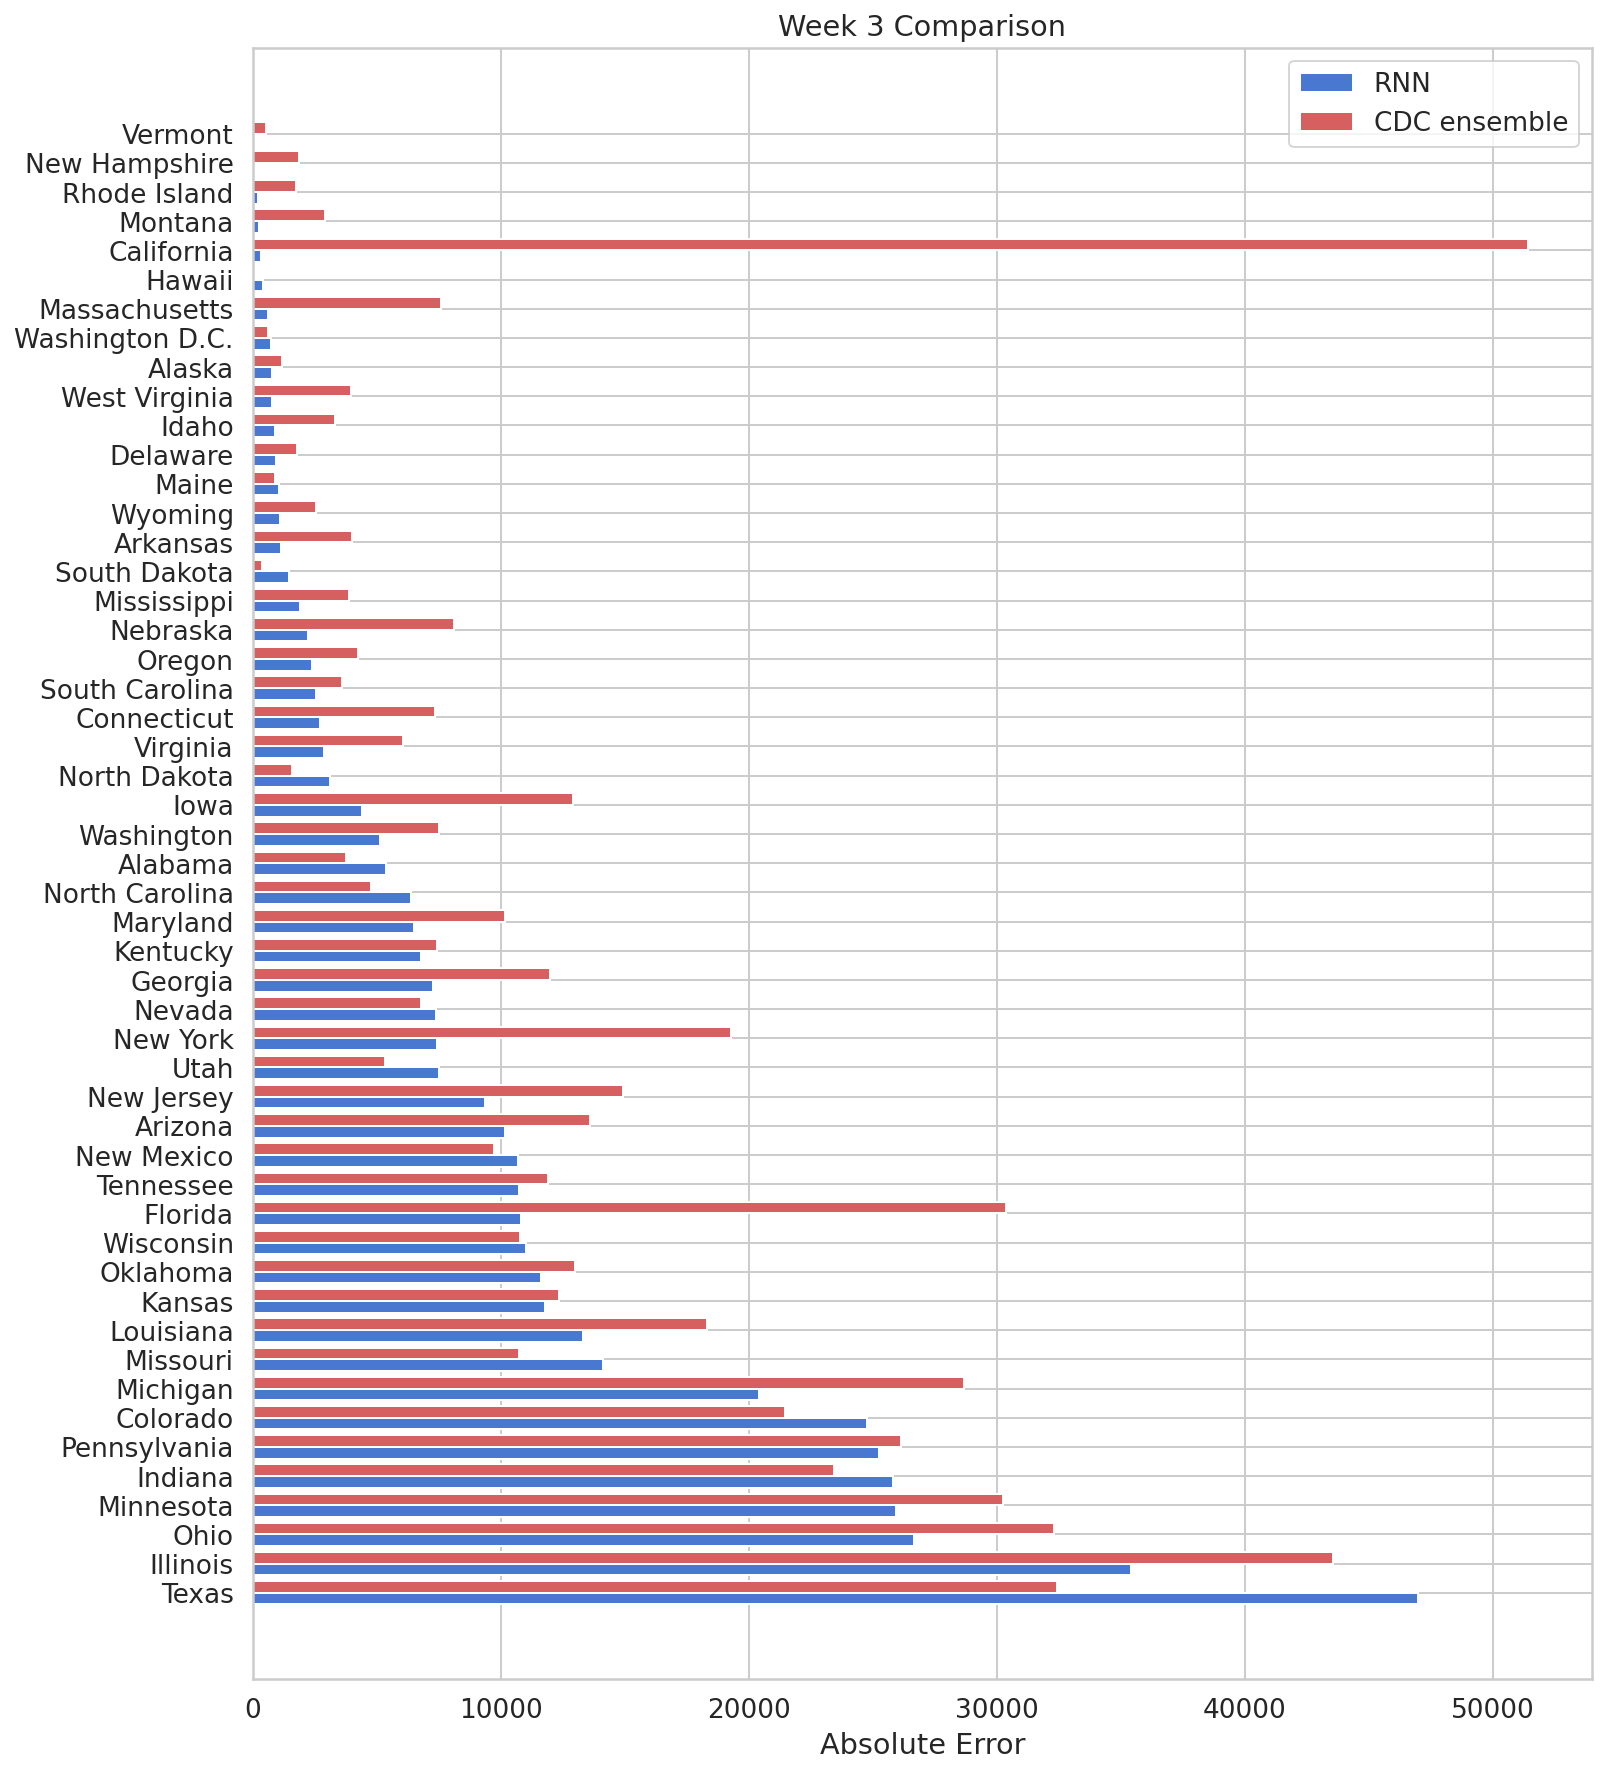

In [ ]:
generate_barplot(3)

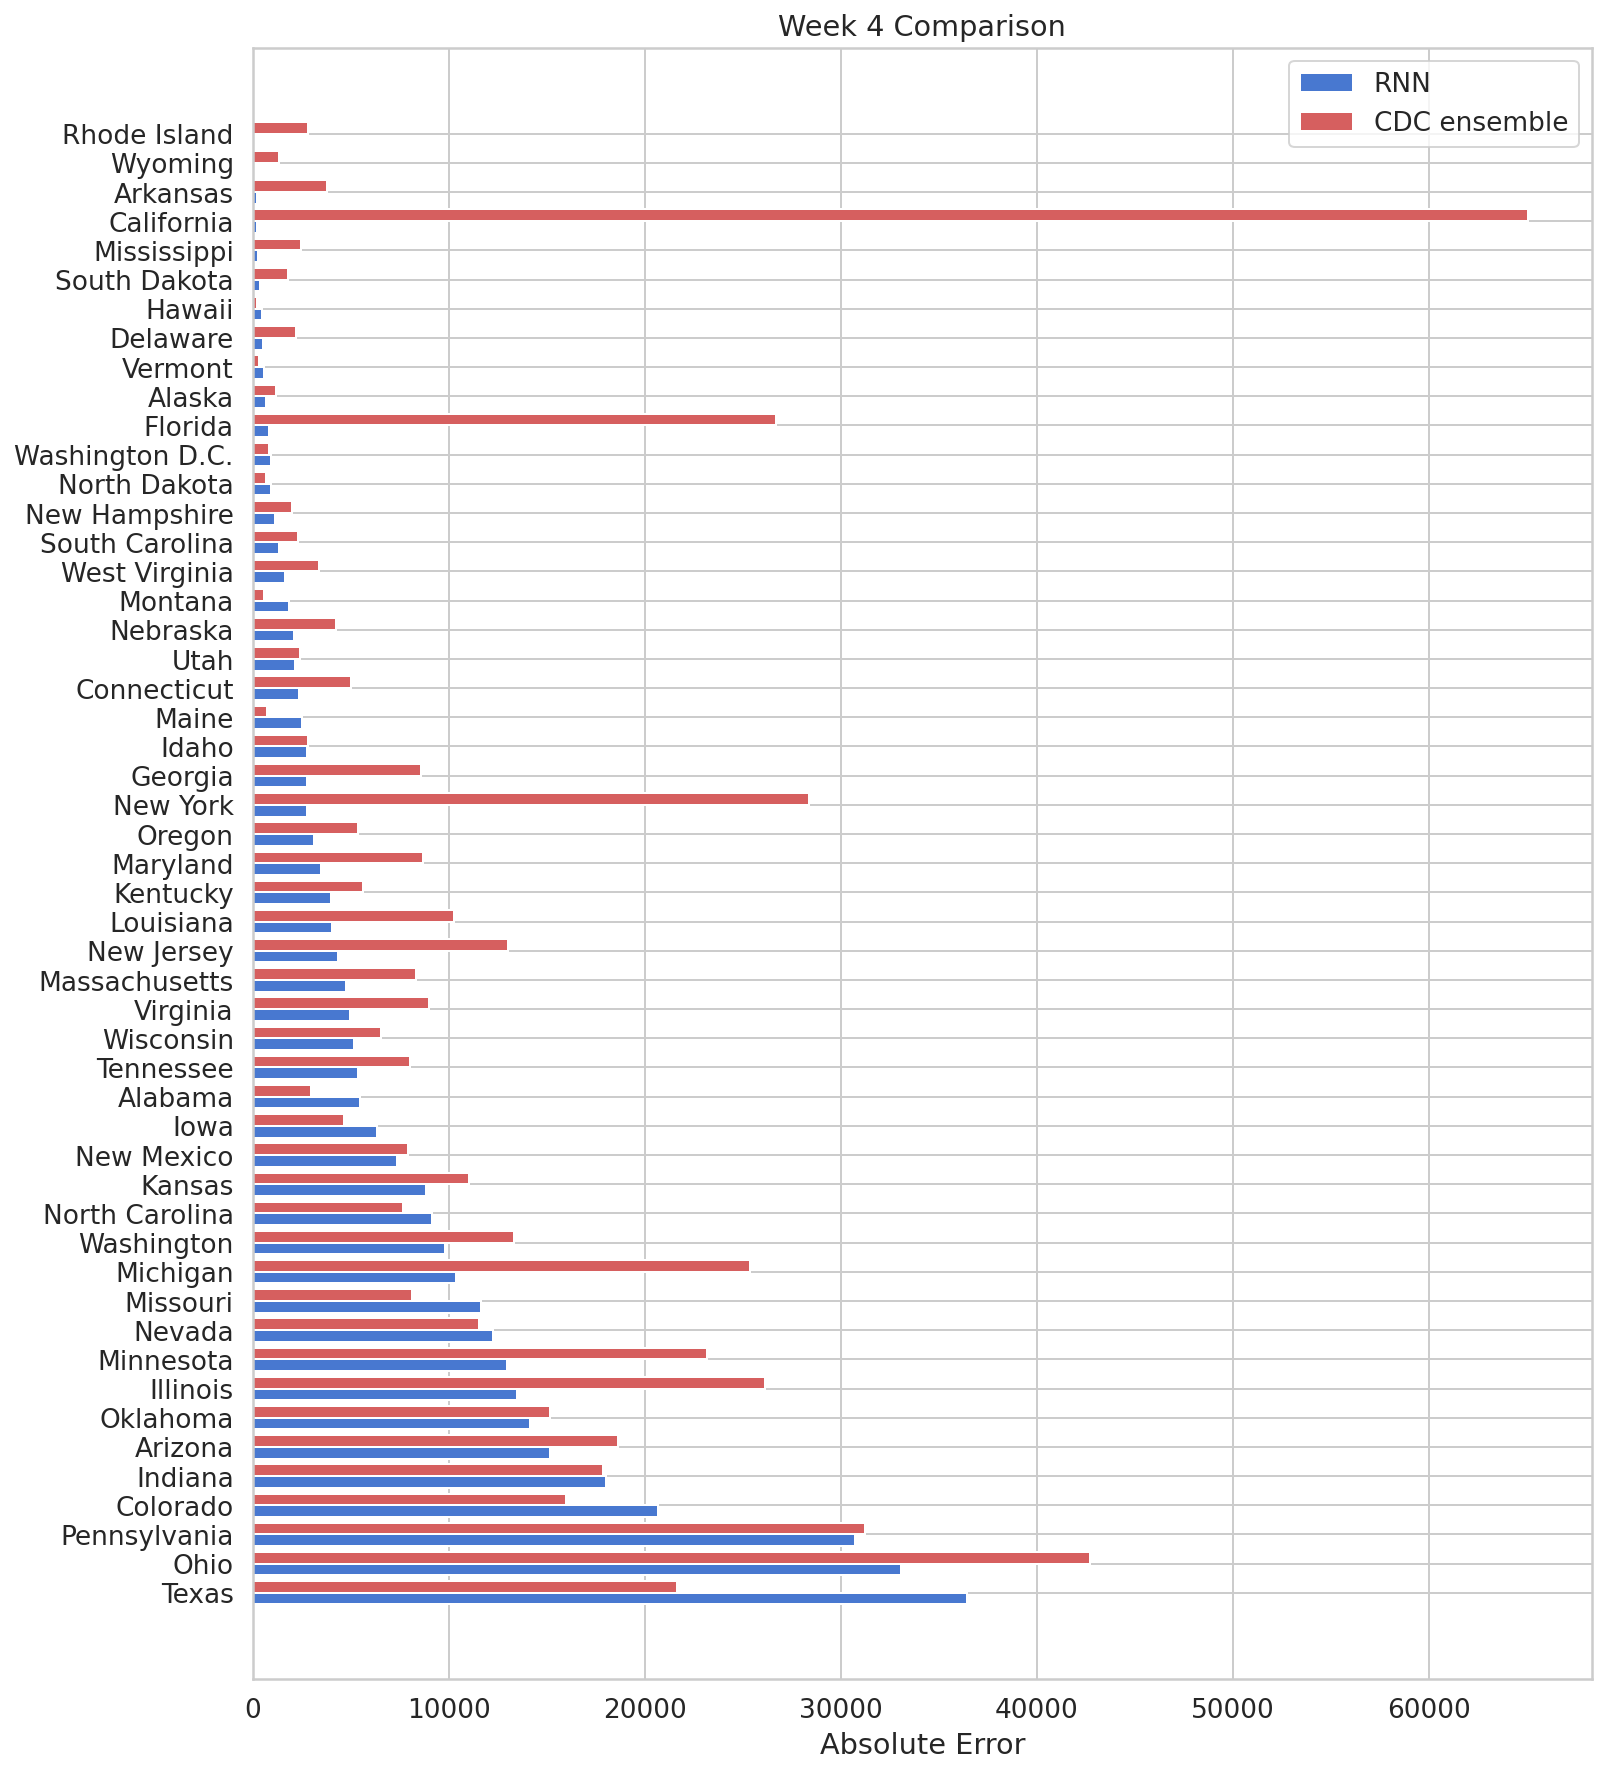

In [ ]:
generate_barplot(4)

# Discussion

## What you've learned

- What concepts from lecture/breakout were most relevant to your project? How so?

We examined a couple of concepts learned from the class, such as the linear regression, random forest, and RNN. The most relevant part is the prediction of the sequential data with LSTM RNN. We also built an online learning training framework to adapt the real time stream data.

- What aspects of your project did you find most surprising?

In general, we find that our model is good at catching the current trend but not the turning points due to policy change or holidays, which is the same as other CDC models. We also find that the model is good for short-term projection, instead of the long-term. Our model is also better when compared with the traditional SEIR transmission model or time series models.


- What was the most helpful feedback you received during your presentation? Why?

The most helpful feeback we recieved for the presentation is the suggestion on normalization. We could normalize the MSE by population.

- If you had two more weeks to work on this project, what would you do next? Why?

First, we would try to reduce the training time. Right now, the training process takes around 3 hours. We would like to train the model on GPU and also try different mini-batch size. Hopefully, we could reduce the training time to less than one hour. This is important if we want to run the model at different time period and do cross validation. Another validation that we would like to do is that in stead of compare the performance at one single week, we want to test the rest at all possible time periods. 

Also, we would like to inlcude more features, like climate data and policy indicator. Instead of only project daily new cases, we also want to predict daily new deaths, which might need additional features.

# References

- Chang, S., Pierson, E., Koh, P.W., Gerardin, J., Redbird, B., Grusky, D. and Leskovec, J., 2020. Mobility network models of COVID-19 explaininequities and inform reopening. Nature, pp.1-8.
- Rader, B., Scarpino, S.V., Nande, A., Hill, A.L., Adlam, B., Reiner, R.C., Pigott, D.M., Gutierrez, B., Zarebski, A.E., Shrestha, M. and Brownstein,J.S., 2020. Crowding and the shape of COVID-19 epidemics. Nature medicine, pp.1-6.
- The COVID-19 Forecast Hub. https://covid19forecasthub.org/.
- JHU CSSE GitHub. https://github.com/CSSEGISandData/COVID-19
- Badr, H.S., Du, H., Marshall, M., Dong, E., Squire, M.M. and Gardner, L.M., 2020.  Association between mobility patterns and COVID-19transmission in the USA: a mathematical modelling study. The Lancet Infectious Diseases, 20(11), pp.1247-1254.
- Ünlü, R. and Namlı, E., 2020.  Machine Learning and Classical Forecasting Methods Based Decision Support Systems for COVID-19.  CMC-COMPUTERS MATERIALS & CONTINUA, 64(3), pp.1383-1399.
- Kefayati, S., Huang, H., Chakraborty, P., Roberts, F., Gopalakrishnan, V., Srinivasan, R., Pethe, S., Madan, P., Deshpande, A., Liu, X. and Hu, J.,2020. On machine learning-based short-term adjustment of epidemiological projections of covid-19 in us. medRxiv.[8] https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/forecasts-cases.html[9] The Institute for Health Metrics and Evaluation (IHME): https://covid19.healthdata.org/global